## Revision History

Update with your details here

Name : Sumukh Venkatesh Murthy

Date : 06/04/2021

## Basic problem statement 
Explore, understand and build on what factors influence energy consumption – for appliance and light

## Data Set Information

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column.

## Attribute Information
* date : time year-month-day hour:minute:second
* Appliances, energy use in Wh 
* lights, energy use of light fixtures in the house in Wh 
* T1, Temperature in kitchen area, in Celsius 
* RH_1, Humidity in kitchen area, in % 
* T2, Temperature in living room area, in Celsius 
* RH_2, Humidity in living room area, in % 
* T3, Temperature in laundry room area 
* RH_3, Humidity in laundry room area, in % 
* T4, Temperature in office room, in Celsius 
* RH_4, Humidity in office room, in % 
* T5, Temperature in bathroom, in Celsius 
* RH_5, Humidity in bathroom, in % 
* T6, Temperature outside the building (north side), in Celsius 
* RH_6, Humidity outside the building (north side), in % 
* T7, Temperature in ironing room , in Celsius 
* RH_7, Humidity in ironing room, in % 
* T8, Temperature in teenager room 2, in Celsius 
* RH_8, Humidity in teenager room 2, in % 
* T9, Temperature in parents room, in Celsius 
* RH_9, Humidity in parents room, in % 
* To, Temperature outside (from Chievres weather station), in Celsius 
* Pressure (from Chievres weather station), in mm Hg 
* RH_out, Humidity outside (from Chievres weather station), in % 
* Wind speed (from Chievres weather station), in m/s 
* Visibility (from Chievres weather station), in km 
* Tdewpoint (from Chievres weather station), in Deg C

## Read data and basic data clean-up

In [36]:
#Importing required python libraries

import pandas as pd
%matplotlib inline

#Reading the Data

df_energy = pd.read_csv(r"C:\Users\sumuk\Desktop\Rolls Royce Data Science Task\energydata_complete\energydata_complete.csv")

df_energy.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [37]:
#To print full summary of the dataframe

df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [38]:
#Data Exploration

df_energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [39]:
#To print number of rows and columns in the dataset

print('The number of rows in dataset is - ' , df_energy.shape[0])
print('The number of columns in dataset is - ' , df_energy.shape[1])

The number of rows in dataset is -  19735
The number of columns in dataset is -  29


In [40]:
#Number of null values in all columns

df_energy.isnull().sum().sort_values(ascending = True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

In [41]:
#Splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split

# 75% of the data is used for the training of the models and the rest is used for testing
train, test = train_test_split(df_energy,test_size=0.25,random_state=40)

In [42]:
# Displaying the training set after splitting

train.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,97.835281,3.809202,21.685153,40.271333,20.343487,40.432370,22.268005,39.252994,20.857724,39.041339,...,19.484679,41.567732,7.422035,755.561311,79.744066,4.057009,38.345054,3.768053,25.014452,25.014452
std,102.928289,7.940816,1.605537,3.983201,2.199037,4.081775,1.999986,3.263513,2.040012,4.355528,...,2.010610,4.167305,5.304241,7.398129,14.952250,2.449080,11.785900,4.189370,14.539819,14.539819
min,10.000000,0.000000,16.790000,27.233333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.366667,24.500000,0.000000,1.000000,-6.600000,0.006033,0.006033
25%,50.000000,0.000000,20.745000,37.363333,18.790000,37.900000,20.790000,36.900000,19.533333,35.530000,...,18.000000,38.500000,3.700000,750.983333,70.000000,2.000000,29.000000,0.933333,12.469764,12.469764
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.560000,20.666667,38.400000,...,19.390000,40.900000,6.933333,756.100000,83.833333,3.666667,40.000000,3.450000,24.936900,24.936900
75%,100.000000,0.000000,22.600000,43.090000,21.533333,43.290000,23.290000,41.790000,22.100000,42.193333,...,20.600000,44.363333,10.433333,760.966667,91.666667,5.500000,40.000000,6.566667,37.736202,37.736202
max,1080.000000,60.000000,26.260000,63.360000,29.856667,56.026667,29.200000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.033333,772.300000,100.000000,14.000000,66.000000,15.500000,49.993173,49.993173


In [43]:
# Divide the columns based on type for clear column management 

col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [44]:
# Seperate dependent and independent variables 

feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms ]
target_vars = train[col_target]

In [45]:
feature_vars.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
count,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,...,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000,14801.000000
mean,21.685153,20.343487,22.268005,20.857724,19.589105,7.923834,20.264300,22.028348,19.484679,40.271333,...,41.567732,7.422035,3.768053,79.744066,755.561311,4.057009,38.345054,3.809202,25.014452,25.014452
std,1.605537,2.199037,1.999986,2.040012,1.842916,6.083047,2.105079,1.951399,2.010610,3.983201,...,4.167305,5.304241,4.189370,14.952250,7.398129,2.449080,11.785900,7.940816,14.539819,14.539819
min,16.790000,16.100000,17.200000,15.100000,15.335000,-6.065000,15.390000,16.306667,14.890000,27.233333,...,29.166667,-5.000000,-6.600000,24.500000,729.366667,0.000000,1.000000,0.000000,0.006033,0.006033
25%,20.745000,18.790000,20.790000,19.533333,18.290000,3.663333,18.700000,20.790000,18.000000,37.363333,...,38.500000,3.700000,0.933333,70.000000,750.983333,2.000000,29.000000,0.000000,12.469764,12.469764
50%,21.600000,20.000000,22.100000,20.666667,19.390000,7.300000,20.028571,22.111111,19.390000,39.656667,...,40.900000,6.933333,3.450000,83.833333,756.100000,3.666667,40.000000,0.000000,24.936900,24.936900
75%,22.600000,21.533333,23.290000,22.100000,20.633333,11.293333,21.600000,23.390000,20.600000,43.090000,...,44.363333,10.433333,6.566667,91.666667,760.966667,5.500000,40.000000,0.000000,37.736202,37.736202
max,26.260000,29.856667,29.200000,26.200000,25.745000,28.290000,25.963333,27.230000,24.500000,63.360000,...,53.326667,26.033333,15.500000,100.000000,772.300000,14.000000,66.000000,60.000000,49.993173,49.993173


In [46]:
# Check the distribution of values in lights column
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [47]:
#To display the values of Appliances column

target_vars.describe()

,Appliances
count,14801.000000
mean,97.835281
std,102.928289
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


OBSERVATIONS:

1.) Temperature columns:

-> Inside house: Min= 14.89 C ; Max= 29.85 C
-> Outside house: Min= -5 C ; Max= 26.03 C
The reason for such variation is due to the sensors being kept outside the house.

2.) Humidity Columns:

-> Inside house: Min= 20.60% ; Max= 63.36%
-> Outside house: Min= 29.82% ; Max= 96.32%

3.) Appliances:

Max Consumption= 1080 Wh
Min Consumption= 10 Wh
-> 75% of appliance consumption is less than 100 Wh.

4.) Lights: 

Max Consumption= 60Wh
-> Lights does not affect the energy consumption very significantly.

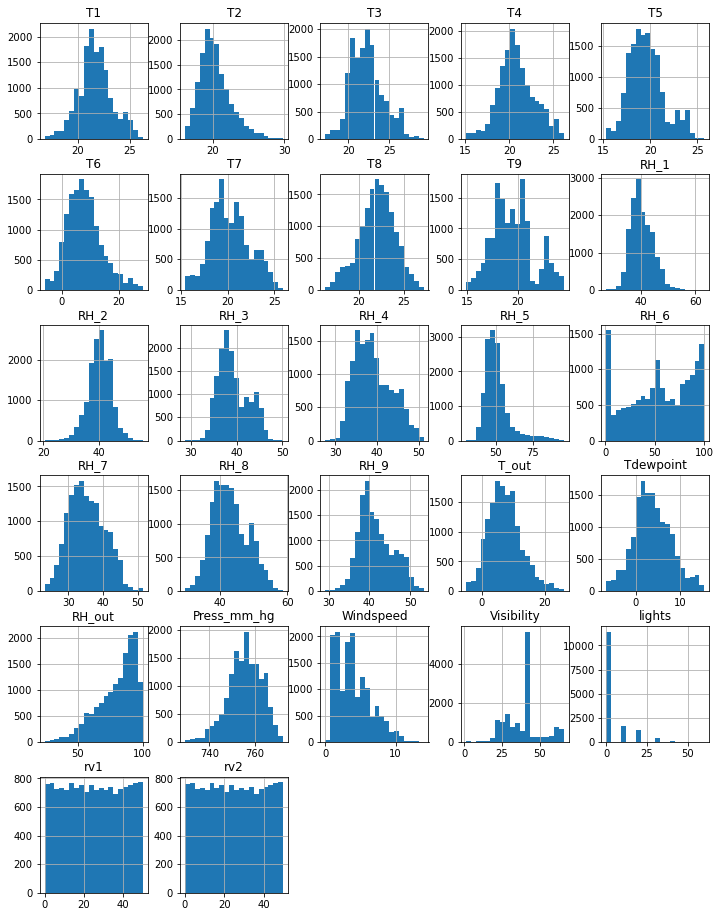

In [48]:
# Histogram of all the features to understand the distribution
feature_vars.hist(bins = 20 , figsize= (12,16)) ;

C:\Users\sumuk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumuk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sumuk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

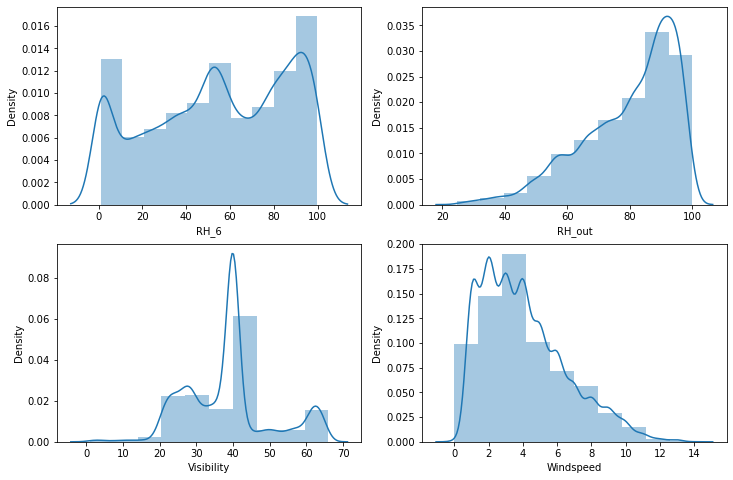

In [49]:
# Specific distplots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

C:\Users\sumuk\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


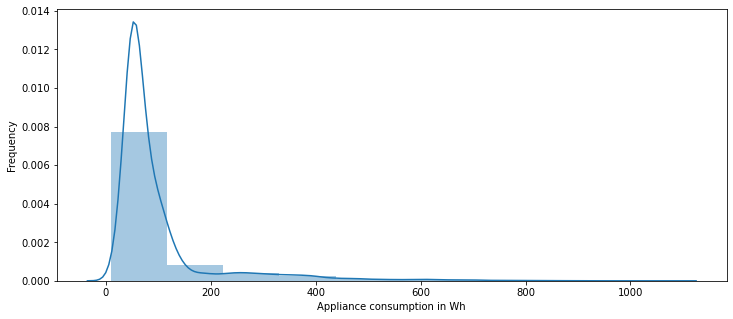

In [50]:
# Distribution of values in Appliances column

f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

OBSERVATIONS:

1.) Temperature: 
-> All columns follow normal distribution except column T9.

2.) Humidity:
-> All columns follow normal distribution except RH_6 and RH_Out, as these sensors are outside the house.

3.) Appliance: This consists of postively skewed data with a mean of 100Wh.

4.) Visibility: This column is negatively skewed.

5.) Windspeed: This column is positively skewed.

In [51]:
#Appliance column range with consumption less than 200 Wh

print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.250659
dtype: float64


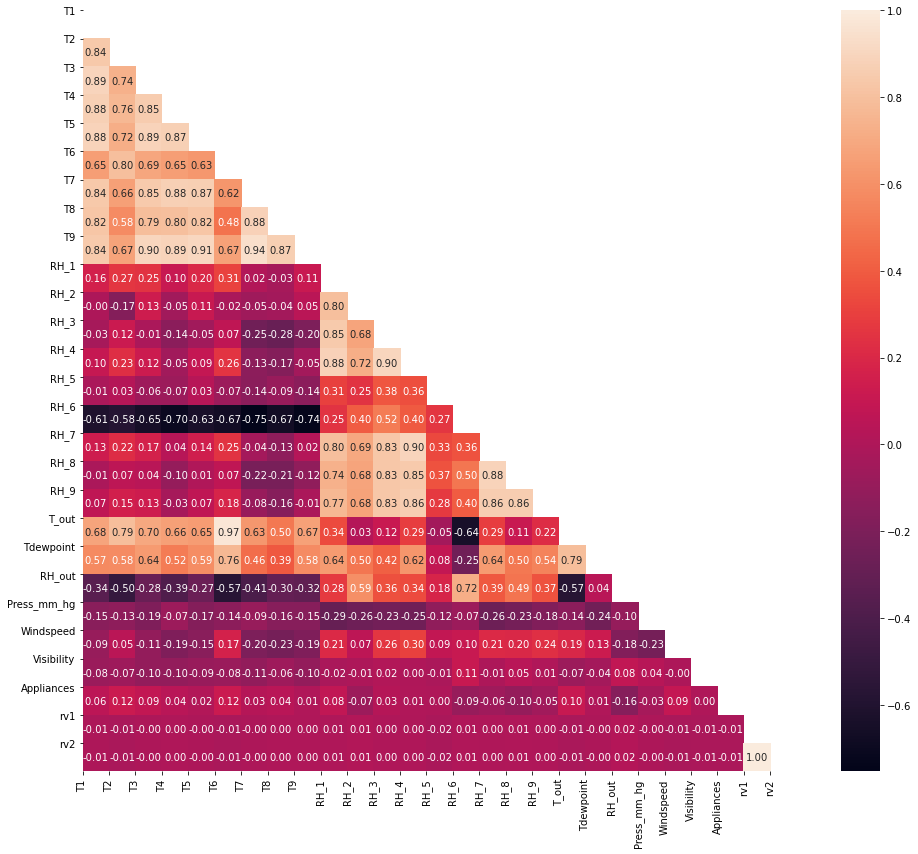

In [52]:
# Using the weather, temperature, appliances and random column to see the correlation

import numpy as np

train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()

# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 14))

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

OBSERVATIONS FOR CORRELATION PLOT:
    
1.) Temperature:
-> Inside temperatures T1-T9 along with outside temperature T_out all have positive correlation with target appliances.
-> The correlations are high for the indoor temperatures.

2.) Weather: Visibility, Tdewpoint and Press_mm_hg have low correlation values.

3.) Humidity: There are no significantly high correlation cases (>0.9) for humidity sensors.

4.) The random variables rv1, rv2 and Visibility, Tdewpoint, Press_mm_hg have low correlation with the target variable.

## Perform analysis & model development 

In [53]:
#Data Preprocessing

#Split training dataset into independent and dependent varibales
train_X = train[feature_vars.columns]
train_y = train[target_vars.columns]

In [54]:
#Split testing dataset into independent and dependent varibales
test_X = test[feature_vars.columns]
test_y = test[target_vars.columns]

In [55]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

# Create test and training set by including Appliances column

train = train[list(train_X.columns.values) + col_target ]

test = test[list(test_X.columns.values) + col_target ]

# Create dummy test and training set to hold scaled values

sc_train = pd.DataFrame(columns=train.columns , index=train.index)

sc_train[sc_train.columns] = sc.fit_transform(train)

sc_test= pd.DataFrame(columns=test.columns , index=test.index)

sc_test[sc_test.columns] = sc.fit_transform(test)

In [56]:
sc_train.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2,Appliances
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,-0.831930,0.349500,0.441571,0.201598,-1.398755,...,-0.978251,-0.803979,0.529878,1.167725,-1.112160,1.922273,2.039003,1.250473,1.250473,-0.270443
19366,1.254979,0.298556,1.561061,1.344290,0.163277,-0.398471,1.299615,1.112907,1.549493,0.004687,...,-0.217827,0.365687,0.931169,0.226014,-1.248270,-1.104045,-0.479715,1.468790,1.468790,-0.464759
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.927664,0.297243,0.822507,0.238072,1.388043,...,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.140422,2.039003,0.048731,0.048731,0.021032
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-1.291694,-0.363087,0.087967,-0.295781,-1.125096,...,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-1.542436,-0.479715,-1.459682,-1.459682,-0.561918
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,0.472833,-0.579502,-0.564579,-0.937398,1.789743,...,0.630579,1.400086,0.864287,0.419763,1.065602,1.752573,0.779644,-1.121664,-1.121664,-0.464759


In [57]:
sc_test.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2,Appliances
6314,-0.678526,-0.337714,-0.758967,-0.272083,-0.811540,-0.344500,-0.409392,-0.946375,-0.629719,-0.352449,...,-0.232839,-1.157146,-1.318014,0.377392,-0.809142,-0.419155,-0.477172,-0.860697,-0.860697,-0.367942
12257,0.814344,0.289201,1.432662,0.317741,1.062631,0.384936,0.811654,1.049857,0.641711,0.671740,...,0.865496,0.485626,-0.967649,-0.401660,0.004891,0.144812,0.785224,-0.387694,-0.387694,3.087003
6271,-0.850621,-1.058130,-0.526796,-0.515812,-0.654758,-1.615218,-0.600348,-0.929458,-0.591661,-0.182731,...,-1.611203,-1.275901,1.191050,0.616061,-0.876978,-0.094874,-0.477172,-1.390762,-1.390762,-0.664080
18179,0.938750,0.485399,0.955147,1.146419,1.134714,0.308202,1.502863,1.400044,1.548768,-0.419664,...,0.591690,0.568755,-0.323430,0.701622,-1.216158,0.144812,0.785224,0.764737,0.764737,-0.565367
9661,0.005706,-0.368370,-0.396714,-0.137220,-0.595289,-0.257240,-0.270881,0.339334,0.054626,-0.797748,...,-0.307513,-0.001268,0.524227,0.917775,0.004891,1.653423,-0.477172,1.052500,1.052500,0.224334


In [58]:
# Remove Appliances column from traininig set

train_X =  sc_train.drop(['Appliances'] , axis=1)
train_y = sc_train['Appliances']

test_X =  sc_test.drop(['Appliances'] , axis=1)
test_y = sc_test['Appliances']

In [59]:
train_X.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,RH_1,...,RH_9,T_out,Tdewpoint,RH_out,Press_mm_hg,Windspeed,Visibility,lights,rv1,rv2
9544,0.569827,-0.383584,-0.384018,0.996241,-0.229230,-0.831930,0.349500,0.441571,0.201598,-1.398755,...,-1.033732,-0.978251,-0.803979,0.529878,1.167725,-1.112160,1.922273,2.039003,1.250473,1.250473
19366,1.254979,0.298556,1.561061,1.344290,0.163277,-0.398471,1.299615,1.112907,1.549493,0.004687,...,0.725258,-0.217827,0.365687,0.931169,0.226014,-1.248270,-1.104045,-0.479715,1.468790,1.468790
10816,0.320681,0.054501,0.366012,-0.229283,0.145189,0.927664,0.297243,0.822507,0.238072,1.388043,...,-0.049050,1.120770,0.803317,-0.896934,-0.733721,0.929492,0.140422,2.039003,0.048731,0.048731
15457,-0.246127,-0.961129,-0.489022,-0.159019,-0.162305,-1.291694,-0.363087,0.087967,-0.295781,-1.125096,...,-1.368892,-1.339609,-1.006881,0.975757,-0.046587,-0.839939,-1.542436,-0.479715,-1.459682,-1.459682
2956,-0.246127,-0.024324,-0.300681,-1.013618,-0.061616,0.472833,-0.579502,-0.564579,-0.937398,1.789743,...,2.719419,0.630579,1.400086,0.864287,0.419763,1.065602,1.752573,0.779644,-1.121664,-1.121664


In [60]:
train_y.head()

9544    -0.270443
19366   -0.464759
10816    0.021032
15457   -0.561918
2956    -0.464759
Name: Appliances, dtype: float64

In [61]:
#Model Implementation

from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR

In [62]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]

In [63]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(train_X,train_y)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(train_y,curr_model.predict(train_X))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(test_y,curr_model.predict(test_X))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(test_y,curr_model.predict(test_X)))
    model_data.append(curr_model_data)

In [64]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.025028467178344727,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': 0.0,
  'Test_RMSE_Score': 1.0},
 {'Name': 'Ridge: ',
  'Train_Time': 0.41286516189575195,
  'Train_R2_Score': 0.16884734034074234,
  'Test_R2_Score': 0.15074782948975174,
  'Test_RMSE_Score': 0.9215487890015636},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.19468212127685547,
  'Train_R2_Score': 0.5729941599513142,
  'Test_R2_Score': 0.36356256268900733,
  'Test_RMSE_Score': 0.79777029106817},
 {'Name': 'SVR:',
  'Train_Time': 11.015135049819946,
  'Train_R2_Score': 0.25800624413057327,
  'Test_R2_Score': 0.22030198152153757,
  'Test_RMSE_Score': 0.8830051067114292},
 {'Name': 'RandomForest ',
  'Train_Time': 36.71645450592041,
  'Train_R2_Score': 0.9310170203947439,
  'Test_R2_Score': 0.5102931687450923,
  'Test_RMSE_Score': 0.6997905624220061},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 11.013487100601196,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.568482050808053,

In [65]:
# Convert list to dataframe
df = pd.DataFrame(model_data)

In [66]:
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.025028,0.000000,0.000000,1.000000
1,Ridge:,0.412865,0.168847,0.150748,0.921549
2,KNeighborsRegressor:,0.194682,0.572994,0.363563,0.797770
3,SVR:,11.015135,0.258006,0.220302,0.883005
4,RandomForest,36.716455,0.931017,0.510293,0.699791
5,ExtraTreeRegressor :,11.013487,1.000000,0.568482,0.656900
6,GradientBoostingClassifier:,8.707043,0.345405,0.249188,0.866494
7,XGBRegressor:,2.881664,0.844044,0.448974,0.742312
8,MLPRegressor:,7.114098,0.352995,0.261573,0.859318


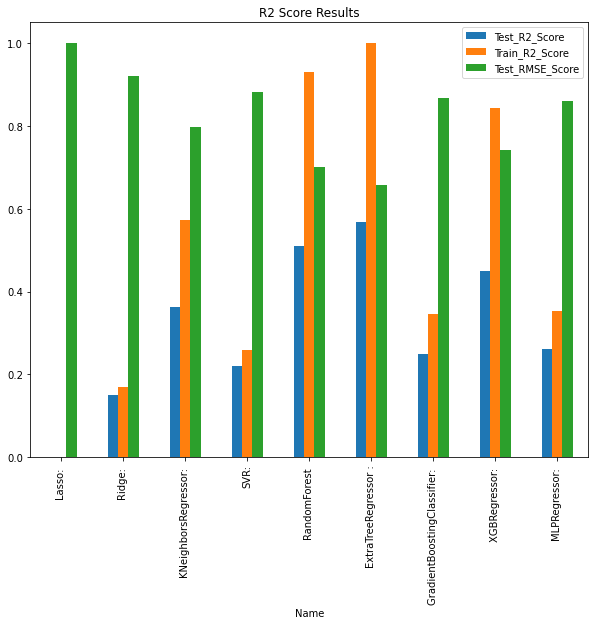

In [67]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

OBSERVATIONS:

1.) Extra Tree Regressor model has given the highest Test_R2_Score of 0.57.

2.) Also, Extra Tree Regressor has given the lowest Test_RMSE_Score of 0.65.

3.) Lasso Regression model performed very poorly when compared with others.

## References
[1] Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788,

[2] https://medium.com/analytics-vidhya/appliances-energy-prediction-2562af6ad3d9

[3] https://machinelearningmastery.com/naive-methods-for-forecasting-household-electricity-consumption/

[4] Sol Kim 1, Sungwon Jung 1,* and Seung-Man Baek 2, A Model for Predicting Energy Usage Pattern Types
with Energy Consumption Information According to the Behaviors of Single-Person Households in South Korea

[5] Brounen, D.; Kok, N.; Quigley, J.M.J.E.E.R. Residential energy use and conservation: Economics and
demographics. Eur. Econ. Rev. 2012, 56, 931–945.
